In [1]:
%load_ext nb_black
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

<IPython.core.display.Javascript object>

# Question 1

In [2]:
from src.stability.stability import logistic_regression
from src.stability.util import load_csv

print("==== Training model on data set A ====")
Xa, Ya = load_csv("src/stability/ds1_a.csv", add_intercept=True)
thetasA = logistic_regression(Xa, Ya)

print("\n==== Training model on data set B ====")
Xb, Yb = load_csv("src/stability/ds1_b.csv", add_intercept=True)
thetasB = logistic_regression(Xb, Yb)


==== Training model on data set A ====
Finished 10000 iterations, grad [-4.15154546e-06  4.27822247e-06  4.08456455e-06], theta [-20.81394174  21.45250215  19.85155266]
Finished 20000 iterations, grad [-3.06369558e-10  3.15718831e-10  3.01427941e-10], theta [-20.81437785  21.45295156  19.85198173]
Finished 30000 iterations, grad [-2.05622084e-14  2.73101064e-14  1.90783804e-14], theta [-20.81437788  21.45295159  19.85198176]
Converged in 30374 iterations, theta [-20.81437788  21.45295159  19.85198176]

==== Training model on data set B ====
Finished 10000 iterations, grad [-0.01939888  0.01935515  0.01946073], theta [-52.74109217  52.92982273  52.69691453]
Finished 20000 iterations, grad [-0.01254117  0.01252944  0.01257037], theta [-68.10040977  68.26496086  68.09888223]
Finished 30000 iterations, grad [-0.00960445  0.00960554  0.00961981], theta [-79.01759142  79.17745526  79.03755803]
Finished 40000 iterations, grad [-0.00790652  0.00791523  0.00791444], theta [-87.70771189  87.8727

<IPython.core.display.Javascript object>

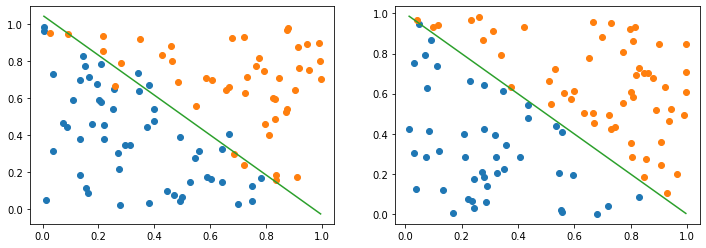

<IPython.core.display.Javascript object>

In [3]:
def plot_decision_boundary(X, thetas, ax):
    x1 = X[:, 1]
    y = (-thetas[0] - x1 * thetas[1]) / thetas[2]
    x1, y = zip(*sorted(zip(x1, y), key=lambda x: x[1]))
    ax.plot(x1, y)


fig, ax = plt.subplots(ncols=2, figsize=(12, 4))

for label in [0, 1]:
    ax[0].plot(Xa[:, 1][Ya == label], Xa[:, 2][Ya == label], "o", label=label)
plot_decision_boundary(Xa, thetasA, ax[0])

for label in [0, 1]:
    ax[1].plot(Xb[:, 1][Yb == label], Xb[:, 2][Yb == label], "o", label=label)
plot_decision_boundary(Xb, thetasB, ax[1])

plt.plot()
plt.show()

1. Training logistics on dataset B take significantly many more iterations than dataset A
2. Dataset B is perfectly linearly separable and thus every gradient step is simply pushing the probability to both 0 and 1. This can be seen from the $\| \theta \|$ (magnitude) that keeps on increasing.
3. i. Simply using a different constant learning rate (> 0) will not help because every gradient step would still push the thetas such that p close to 0 or 1.  
    ii. As $t \rightarrow 0$, learning_rate $\rightarrow 0$, thus this would cause the algorithm to converge.  
    iii. Linear scaling will not stop the gradient step to keep pushing the p to 0 or 1.  
    iv. This will lead to convergence because now there is a tradeoff between the magnitude of $\theta$ and the log loss.  
    v. Yes, because this will cause the data to be no longer perfectly linearly separable.

# Question 2

In [4]:
from src.spam.util import *
from src.spam.spam import *

<IPython.core.display.Javascript object>

In [5]:
train_messages, train_labels = load_spam_dataset("src/spam/spam_train.tsv")
val_messages, val_labels = load_spam_dataset("src/spam/spam_val.tsv")
test_messages, test_labels = load_spam_dataset("src/spam/spam_test.tsv")

dictionary = create_dictionary(train_messages)

print("Size of dictionary: ", len(dictionary))

write_json("spam_dictionary", dictionary)

train_matrix = transform_text(train_messages, dictionary)

np.savetxt("spam_sample_train_matrix", train_matrix[:100, :])

val_matrix = transform_text(val_messages, dictionary)
test_matrix = transform_text(test_messages, dictionary)

naive_bayes_model = fit_naive_bayes_model(train_matrix, train_labels)

naive_bayes_predictions = predict_from_naive_bayes_model(naive_bayes_model, test_matrix)

np.savetxt("spam_naive_bayes_predictions", naive_bayes_predictions)

naive_bayes_accuracy = np.mean(naive_bayes_predictions == test_labels)

print(
    "Naive Bayes had an accuracy of {} on the testing set".format(naive_bayes_accuracy)
)

Size of dictionary:  1722
Naive Bayes had an accuracy of 0.982078853046595 on the testing set


<IPython.core.display.Javascript object>

In [6]:
top_5_words = get_top_five_naive_bayes_words(naive_bayes_model, dictionary)

print("The top 5 indicative words for Naive Bayes are: ", top_5_words)

write_json("spam_top_indicative_words", top_5_words)

The top 5 indicative words for Naive Bayes are:  ['urgent!', 'tone', 'prize', 'won', 'claim']


<IPython.core.display.Javascript object>

In [7]:
optimal_radius = compute_best_svm_radius(
    train_matrix, train_labels, val_matrix, val_labels, [0.01, 0.1, 1, 10]
)

write_json("spam_optimal_radius", optimal_radius)

print("The optimal SVM radius was {}".format(optimal_radius))

The optimal SVM radius was 0.1


<IPython.core.display.Javascript object>

In [8]:
svm_predictions = train_and_predict_svm(
    train_matrix, train_labels, test_matrix, optimal_radius
)

svm_accuracy = np.mean(svm_predictions == test_labels)

print("The SVM model had an accuracy of {} on the testing set".format(svm_accuracy))

The SVM model had an accuracy of 0.9695340501792115 on the testing set


<IPython.core.display.Javascript object>

# Question 3

![3a](answers/3a.png)

![3b](answers/3b.png)

![3c](answers/3c.png)

![3d](answers/3d.png)

![3e](answers/3e.png)

- https://stats.stackexchange.com/questions/48509/proof-of-closeness-of-kernel-functions-under-pointwise-product/50289
- https://www.quora.com/How-do-I-formally-proof-the-product-of-two-kernels-is-a-kernel-If-K1-x-x1-and-K2-x-x2-are-both-kernel-function-then-K1-x-x1-K2-x-x2-is-also-a-kernel

![3f](answers/3f.png)

![3g](answers/3g.png)

![3h](answers/3h.png)

# Question 4

## 4.a

### i

Represent $\theta$ with $\beta \in \mathbb{R}^n$ and $\phi(x)$, i.e.

$$ \theta = \sum_{i=1}^n \beta_i \phi(x^i) $$

where $ \theta^{(0)} $ could simply be represented as a single scalar value 0.

### ii

\begin{align*}
    {\theta^{(i)}}^T \phi(x^{(i+1)}) &= \sum_{j=1}^i \beta_j \phi(x^j) \phi(x^{(i+1)}) \\
    &= \sum_{j=1}^i \beta_j K(x^j, x^{(i+1)})
\end{align*}

### iii

New update rule, for $ i = 0, \dots, n-1$:

$$ \beta^{(i+1)} := \beta^{(i)} + \alpha \Big(y^{(i)} - \sum_{j=1}^i \beta_j K(x^j, x^{(i+1)}) \Big)$$

In [9]:
from src.perceptron.perceptron import *

<IPython.core.display.Javascript object>

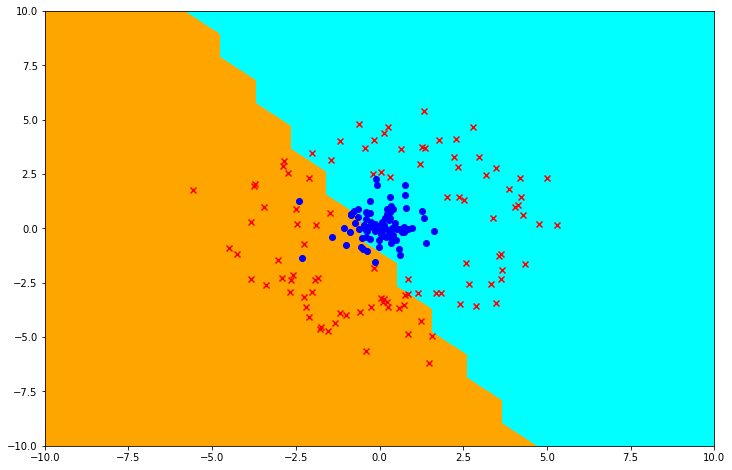

<IPython.core.display.Javascript object>

In [10]:
train_perceptron("dot", dot_kernel, 0.5)


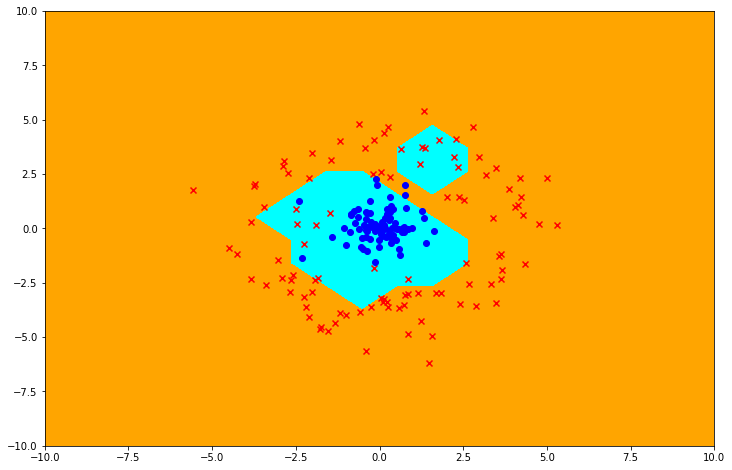

<IPython.core.display.Javascript object>

In [11]:
train_perceptron("rbf", rbf_kernel, 0.5)


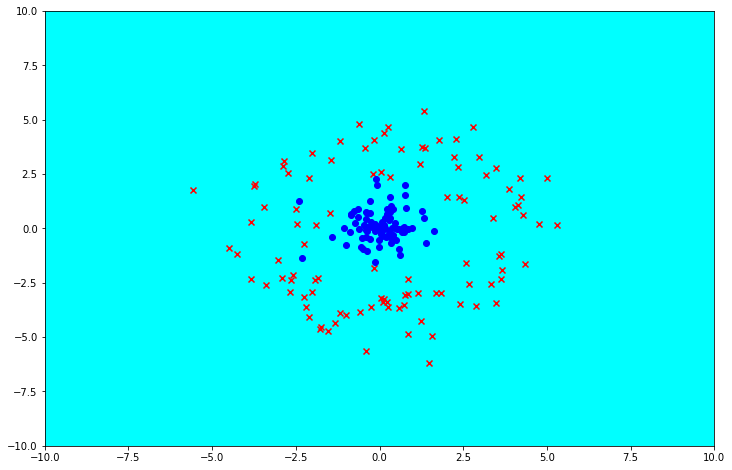

<IPython.core.display.Javascript object>

In [12]:
train_perceptron("non_psd", non_psd_kernel, 0.5)
